<a href="https://colab.research.google.com/github/joshIsac/ADA/blob/main/image_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from google.colab.patches import cv2_imshow
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


In [ ]:
#loading the mnist datasets from tensorflow.

from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
import numpy as np


In [ ]:
#extracting a sample of 2000 images
sample_size = 2000
random_indices = np.random.choice(x_train.shape[0], sample_size, replace=False)
x_train_sample = x_train[random_indices]
y_train_sample = y_train[random_indices]

print("Shape of the sample data:", x_train_sample.shape)


Shape of the sample data: (2000, 28, 28)


In [ ]:
#reshaping the datasets
x_train = x_train.reshape((x_train.shape[0], 28*28)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28*28)).astype('float32')

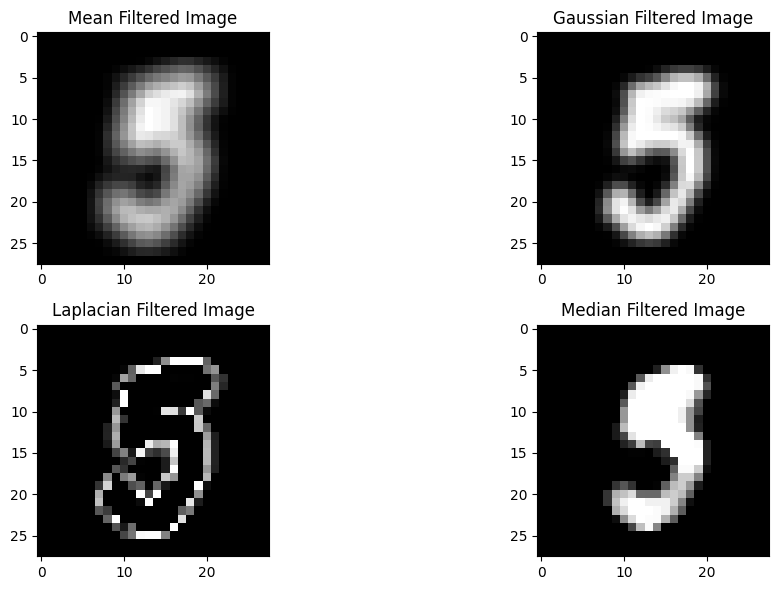

In [ ]:
# prompt: do  it by defining a function to apply filters for above data

def apply_filter(image, filter_type, kernel_size=3):

  if filter_type == 'mean':
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
    filtered_image = cv2.filter2D(image, -1, kernel)
  elif filter_type == 'gaussian':
    filtered_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
  elif filter_type == 'laplacian':
    kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    filtered_image = cv2.filter2D(image, -1, kernel)
  elif filter_type == 'median':
    filtered_image = cv2.medianBlur(image.astype(np.uint8), kernel_size)
  else:
    raise ValueError("Invalid filter type. Choose from 'mean', 'gaussian', 'laplacian', or 'median'.")

  return filtered_image

# Example usage:
sample_image = x_train_sample[0]
mean_filtered_image = apply_filter(sample_image, 'mean', kernel_size=5)
gaussian_filtered_image = apply_filter(sample_image, 'gaussian', kernel_size=3)
laplacian_filtered_image = apply_filter(sample_image, 'laplacian')
median_filtered_image = apply_filter(sample_image, 'median', kernel_size=5)

# Display the filtered images (optional)
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(mean_filtered_image, cmap='gray')
plt.title('Mean Filtered Image')
plt.subplot(2, 2, 2)
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.subplot(2, 2, 3)
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.subplot(2, 2, 4)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.tight_layout()
plt.show()


In [ ]:
#building the SVC model

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Flatten the images for SVC
x_train_flattened = x_train.reshape(x_train.shape[0], -1) # Changed X_train to x_train
x_test_flattened = x_test.reshape(x_test.shape[0], -1) # Changed X_test to x_test

# Create an SVC model
model = SVC()

# Train the model
model.fit(x_train_flattened, y_train) # Changed X_train_flattened to x_train_flattened

# Make predictions
y_pred = model.predict(x_test_flattened) # Changed X_test_flattened to x_test_flattened

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9792


In [ ]:

#building Svc model for each filtering techniques

# Mean Filtering
x_train_mean = np.array([apply_filter(img, 'mean') for img in x_train_sample])
x_train_mean = x_train_mean.reshape(x_train_mean.shape[0], -1)
model_mean = SVC()
model_mean.fit(x_train_mean, y_train_sample)
y_pred_mean = model_mean.predict(x_test.reshape(x_test.shape[0], -1))
accuracy_mean = accuracy_score(y_test, y_pred_mean)
print("Accuracy with Mean Filtering:", accuracy_mean)

# Gaussian Filtering
x_train_gaussian = np.array([apply_filter(img, 'gaussian') for img in x_train_sample])
x_train_gaussian = x_train_gaussian.reshape(x_train_gaussian.shape[0], -1)
model_gaussian = SVC()
model_gaussian.fit(x_train_gaussian, y_train_sample)
y_pred_gaussian = model_gaussian.predict(x_test.reshape(x_test.shape[0], -1))
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
print("Accuracy with Gaussian Filtering:", accuracy_gaussian)

# Laplacian Filtering
x_train_laplacian = np.array([apply_filter(img, 'laplacian') for img in x_train_sample])
x_train_laplacian = x_train_laplacian.reshape(x_train_laplacian.shape[0], -1)
model_laplacian = SVC()
model_laplacian.fit(x_train_laplacian, y_train_sample)
y_pred_laplacian = model_laplacian.predict(x_test.reshape(x_test.shape[0], -1))
accuracy_laplacian = accuracy_score(y_test, y_pred_laplacian)
print("Accuracy with Laplacian Filtering:", accuracy_laplacian)

# Median Filtering
x_train_median = np.array([apply_filter(img, 'median') for img in x_train_sample])
x_train_median = x_train_median.reshape(x_train_median.shape[0], -1)
model_median = SVC()
model_median.fit(x_train_median, y_train_sample)
y_pred_median = model_median.predict(x_test.reshape(x_test.shape[0], -1))
accuracy_median = accuracy_score(y_test, y_pred_median)
print("Accuracy with Median Filtering:", accuracy_median)


Accuracy with Mean Filtering: 0.9365
Accuracy with Gaussian Filtering: 0.9412
Accuracy with Laplacian Filtering: 0.3518
Accuracy with Median Filtering: 0.9373


In [ ]:
 #imprting one of the image in mnistdataset and implementing CNN model before and after filtering and predicting

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Select an image from the test set
test_image_index = 0
test_image = x_test[test_image_index]
true_label = y_test[test_image_index]

# Reshape the image for CNN input
test_image_cnn = test_image.reshape(1, 28, 28, 1)

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Predict on the original image
prediction_before = model.predict(test_image_cnn)
predicted_label_before = np.argmax(prediction_before)

# Apply a filter (e.g., Gaussian)
filtered_image = apply_filter(test_image.reshape(28, 28), 'gaussian')
filtered_image_cnn = filtered_image.reshape(1, 28, 28, 1)

# Predict on the filtered image
prediction_after = model.predict(filtered_image_cnn)
predicted_label_after = np.argmax(prediction_after)

print("True Label:", true_label)
print("Predicted Label (Before Filtering):", predicted_label_before)
print("Predicted Label (After Filtering):", predicted_label_after)


1/1 [==============================] - 0s 16ms/step
True Label: 7
Predicted Label (Before Filtering): 0
Predicted Label (After Filtering): 6


In [ ]:
#loading the mnist dataset
mnist=fetch_openml('mnist_784',version=1)
x=mnist.data
y=mnist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64

In [ ]:
#standardize the data
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

#reduce the dimensionality
pca=PCA(n_components=50)
x_pca=pca.fit_transform(x_scaled)

In [ ]:
#applying k-means clustering
kmeans=KMeans(n_clusters=10,random_state=45)
kmeans.fit(x_pca)
cluster=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from scipy.stats import mode
#mapping each cluster to the true label
labels=np.zeros_like(cluster)
for i in range(10):
  mask=(cluster_labels==i)
  labels[mask]=mode(y[mask])[0]

In [ ]:
#accuracy calculating
accuracy=accuracy_score(y,labels)
print(accuracy)

0.5209714285714285


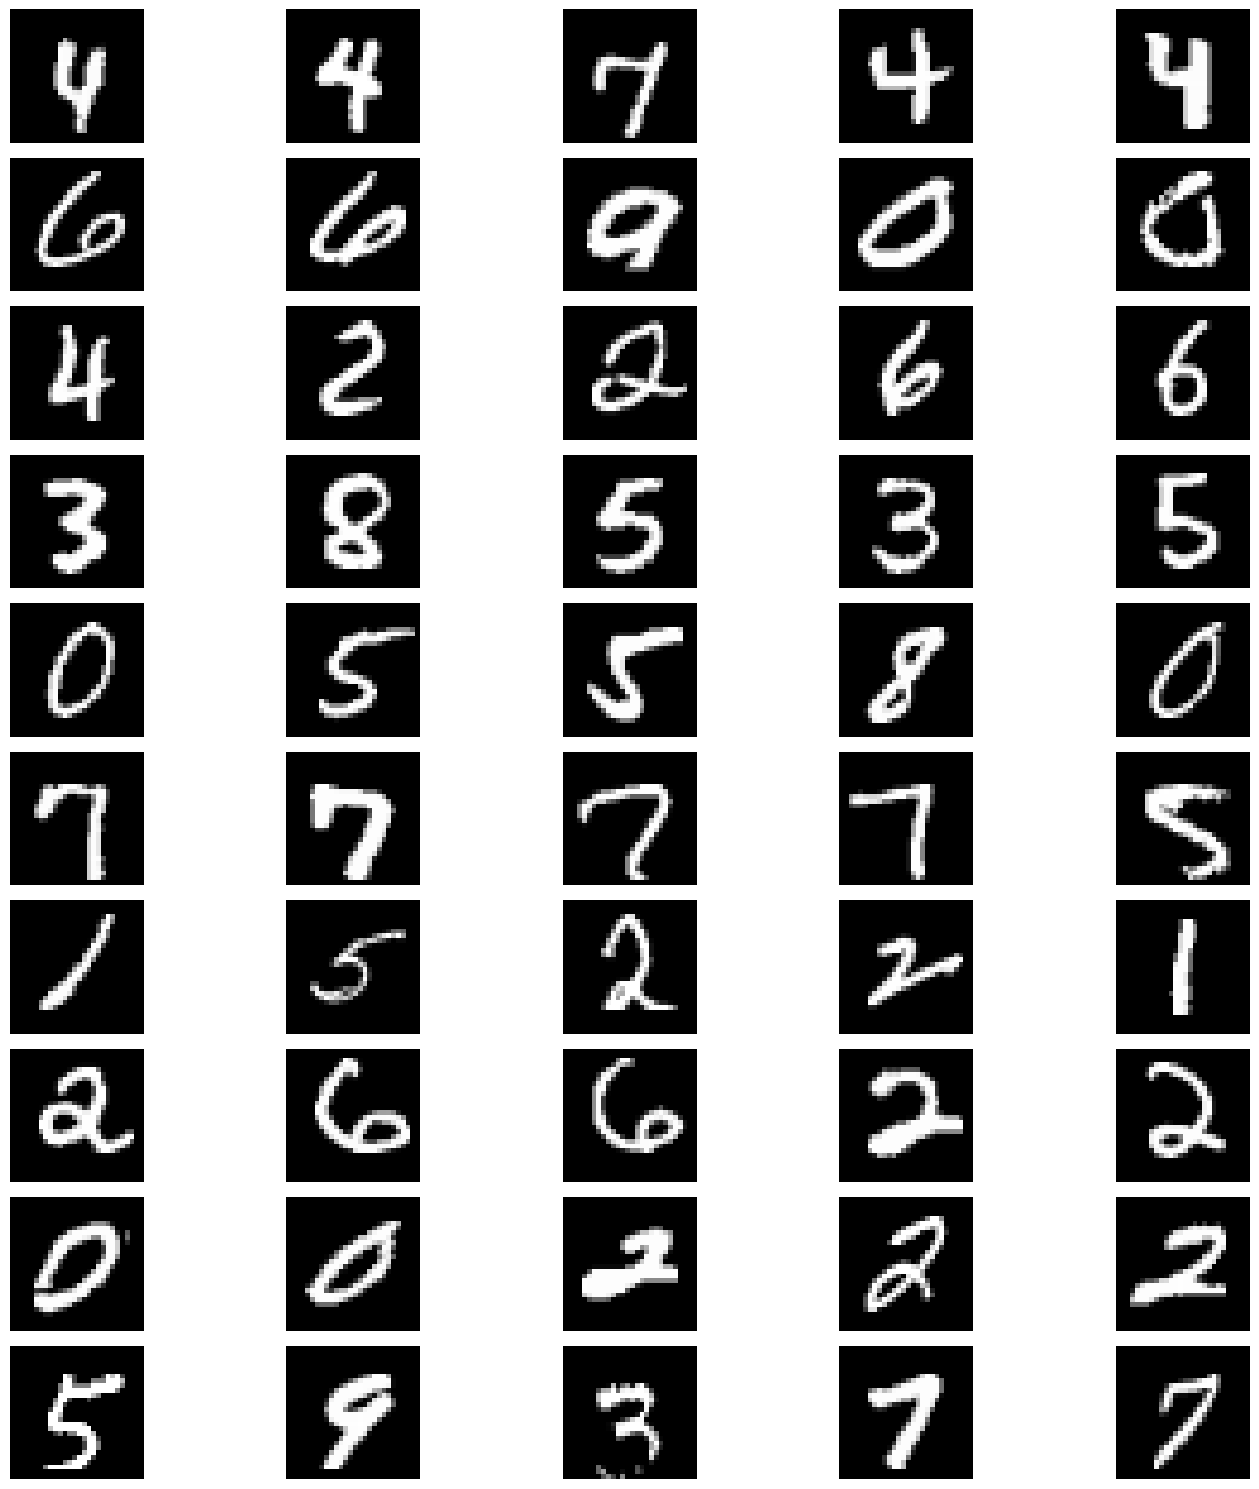

In [ ]:
# Visualize the clustered images
import matplotlib.pyplot as plt

# Choose a random sample of images from each cluster
num_samples_per_cluster = 5
fig, axes = plt.subplots(10, num_samples_per_cluster, figsize=(15, 15))

for i in range(10):
    cluster_indices = np.where(cluster == i)[0]
    random_indices = np.random.choice(cluster_indices, num_samples_per_cluster, replace=False)
    for j, idx in enumerate(random_indices):
        image = x.iloc[idx].values.reshape(28, 28)
        axes[i, j].imshow(image, cmap='gray')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# prompt: find how many are clustered wrongly for each digits

# Calculate the number of wrongly clustered images for each digit
wrong_clustered_counts = {}
for i in range(10):
    mask = (cluster == i)
    true_labels_in_cluster = y[mask]
    wrong_count = np.sum(true_labels_in_cluster != mode(true_labels_in_cluster)[0])
    wrong_clustered_counts[i] = wrong_count

# Print the results
for digit, count in wrong_clustered_counts.items():
    print(f"Digit {digit}: {count} wrongly clustered images")


Digit 0: 6216 wrongly clustered images
Digit 1: 530 wrongly clustered images
Digit 2: 1636 wrongly clustered images
Digit 3: 6866 wrongly clustered images
Digit 4: 4631 wrongly clustered images
Digit 5: 1274 wrongly clustered images
Digit 6: 5116 wrongly clustered images
Digit 7: 1642 wrongly clustered images
Digit 8: 1843 wrongly clustered images
Digit 9: 3283 wrongly clustered images


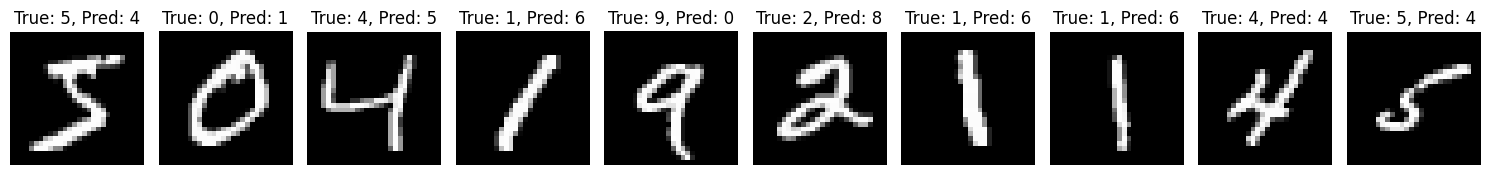

In [ ]:
# Visualize misclassified images
num_samples = min(num_misclassified, 10)  # Show up to 10 misclassified images
fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

for i in range(num_samples):
    idx = misclassified_indices[i]
    image = x.iloc[idx].values.reshape(28, 28)
    true_label = y[idx]
    predicted_label = cluster[idx]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"True: {true_label}, Pred: {predicted_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#improving the model accuracy to classify every digits correctly
